# Exploring Dandiset 001366: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

---

**AI-generated notebook:** *This notebook was generated automatically and has not been fully verified. Please use caution when interpreting code, results, or summaries. Carefully check and validate any analysis prior to drawing scientific conclusions.*

---

## Overview

This notebook enables interactive exploration of version 0.250324.1603 of [Dandiset 001366](https://dandiarchive.org/dandiset/001366/0.250324.1603):  
**"Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification"**

*Description*: movies of a pial vessel of mice used in the experiments.

[Direct DOI link](https://doi.org/10.48324/dandi.001366/0.250324.1603)

**Scientific context:**  
Surface (pial) vessel pulsatility and diameter fluctuations reflect brain physiology and are quantified using two-photon or epifluorescence imaging. This data is useful for studying blood flow, vessel biomechanics, and cerebrovascular health. Accurately measuring the vessel diameter over time aids in comparing quantification algorithms (e.g., Radon transform, FWHM methods). This Dandiset provides high-spatiotemporal-resolution movies of mouse pial vessels for algorithmic and physiological analyses.

**Keywords:** full width at half maximum, vessel pulsation, image analysis, vessel diameter, radon transform

This notebook covers:
- How to access this Dandiset using the DANDI API
- Summary and metadata for a selected NWB file
- Visualization and basic analysis (mean image, sample frame, timeseries from ROI, kymograph) of vessel movie data
- Guidance for further data exploration

---

## Required packages

This notebook assumes the following Python packages are already installed in your environment:

- dandi
- pynwb
- h5py
- remfile
- numpy
- matplotlib

---

## Load the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive and load Dandiset metadata
client = DandiAPIClient()
dandiset = client.get_dandiset("001366", "0.250324.1603")
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List first 5 assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification
Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603

First 5 assets:
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (ID: 71fa07fc-4309-4013-8edd-13213a86a67d)
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (ID: 2f12bce3-f841-46ca-b928-044269122a59)


## NWB File Selection & Overview

For illustration, we focus on the file:

```
sub-F15/sub-F15_ses-F15BC-19102023_image.nwb
```

- **Asset ID:** `71fa07fc-4309-4013-8edd-13213a86a67d`
- [Direct download URL](https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/)
- [View this file on neurosift.app](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/&dandisetId=001366&dandisetVersion=0.250324.1603)

### File Structure (summary)

**File metadata:**

| Property      | Value                                                  |
|:------------- |:------------------------------------------------------|
| Identifier    | 202309_Hashmat-OCT.2023-F15BC-19102023                |
| Description   | Vessel diameter and pulsatility measurement.           |
| Experimenter  | Ghanizada, Hashmat                                    |
| Institution   | University of Copenhagen                              |
| Subject ID    | F15                                                   |
| Species       | Mus musculus                                          |
| Age           | P9W/P16W (reference: birth)                           |
| Sex           | F                                                     |
| Strain        | C57BL/6J                                              |
| Session start | 2023-10-19                                            |

**Data acquisition:**
- <b>Movies</b>: ImageSeries dataset (shape: 9553 x 214 x 132; dtype: uint16)
  - 16-bit grayscale time-lapse movie of mouse brain pial vessel
  - Rate: 54.47 Hz, First 9553 frames, pixel size: 214x132

---

## Loading and Visualizing Data from the NWB File

Here is how to open and explore the file using PyNWB and remfile (streaming):

In [2]:
import pynwb
import h5py
import remfile
import numpy as np

# URL for remote NWB file (Asset ID as above)
nwb_url = "https://api.dandiarchive.org/api/assets/71fa07fc-4309-4013-8edd-13213a86a67d/download/"

# Open the NWB file remotely
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print session/experiment metadata
print("Session description:", nwb.session_description)
print("Experimenter:", nwb.experimenter)
print("Experiment description:", nwb.experiment_description)
print("Subject:", nwb.subject.subject_id, nwb.subject.species, "Sex:", nwb.subject.sex)
print("Session start time:", nwb.session_start_time)
print("NWB identifier:", nwb.identifier)

# Show expanded NWB file structure: root, acquisition, and Movies fields
def print_nwb_hierarchy(obj, indent=""):
    if hasattr(obj, "keys"):
        for k in obj.keys():
            print(f"{indent}- {k}")
            try:
                print_nwb_hierarchy(obj[k], indent + "  ")
            except Exception:
                pass

print("NWB file root fields:")
print_nwb_hierarchy(nwb)
print("\n/acquisition fields:")
print_nwb_hierarchy(nwb.acquisition)
print("\nMovies fields:")
if "Movies" in nwb.acquisition:
    for key in dir(nwb.acquisition["Movies"]):
        if not key.startswith("_"):
            print(f"  - {key}")

# Print key movie metadata
movies = nwb.acquisition["Movies"]
print(f"\nMovies: shape={movies.data.shape}, dtype={movies.data.dtype}")
print("Movies description:", movies.description)
print("Frame rate:", movies.rate, "Hz")
print("Unit:", movies.unit)
print("Starting time:", movies.starting_time)
print("Resolution:", movies.resolution)

Session description: a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Experimenter: ('Ghanizada, Hashmat ',)
Experiment description: Vessel diameter and pulsatility measurement.
Subject: F15 Mus musculus Sex: F
Session start time: 2023-10-19 02:00:00-04:00
NWB identifier: 202309_Hashmat-OCT.2023-F15BC-19102023
NWB file root fields:

/acquisition fields:
- Movies

Movies fields:
  - DEFAULT_CONVERSION
  - DEFAULT_DATA
  - DEFAULT_OFFSET
  - DEFAULT_RESOLUTION
  - DEFAULT_UNIT
  - all_children
  - all_objects
  - bits_per_pixel
  - children
  - comments
  - container_source
  - continuity
  - control
  - control_description
  - conversion
  - css_style
  - data
  - data_link
  - data_type
  - description
  - device
  - dimension
  - external_file
  - fields
  - format
  - generate_new_id
  - get_ancestor
  - get_ancestors
  - get_data_in_units
  - get_fields_conf
  - get_read_io
  - get_timestamps
  - interval


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring the Movies Data

The main data in this NWB file is the time-lapse movie stored in the "Movies" acquisition. For illustration,
we examine only the first 100 frames to ensure interactive performance.

**Note:** For analysis, you may wish to process more or all frames, but streaming large arrays over the network can be slow.

In [3]:
import matplotlib.pyplot as plt

# Load first n_subset frames just once for analysis and plotting
num_frames = movies.data.shape[0]
height = movies.data.shape[1]
width = movies.data.shape[2]
n_subset = min(100, num_frames)
frames = np.array(movies.data[0:n_subset])

print(f"Movies data shape: {movies.data.shape}, dtype: {movies.data.dtype}")
print(f"Total frames: {num_frames}, Frame size: {height}x{width}")
print(f"Analyzing the first {n_subset} frames only.")

Movies data shape: (9553, 214, 132), dtype: uint16
Total frames: 9553, Frame size: 214x132
Analyzing the first 100 frames only.


#### Mean Image Across the First 100 Frames

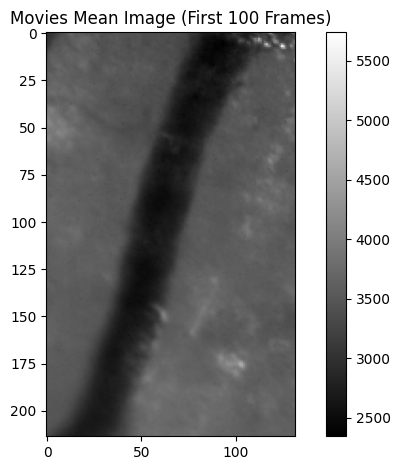

In [4]:
# Compute mean image across time (only for first 100 frames for speed)
mean_image = frames.mean(axis=0)
fig, ax = plt.subplots()
im = ax.imshow(mean_image, cmap="gray")
ax.set_title(f"Movies Mean Image (First {n_subset} Frames)")
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

The above plot shows the average intensity projection across the first 100 frames, highlighting the location and size of the pial vessel.

#### Sample Frame From the Movie

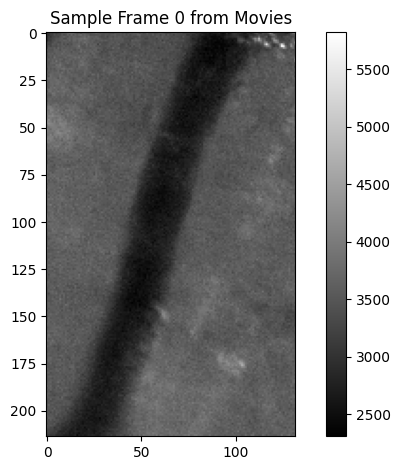

In [5]:
sample_frame = frames[0]
fig, ax = plt.subplots()
im = ax.imshow(sample_frame, cmap="gray")
ax.set_title("Sample Frame 0 from Movies")
plt.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

This single frame provides a snapshot of the vessel and background tissue at one timepoint.

**Frame stats (first 100 frames):**

In [6]:
print("Mean pixel value (mean image):", mean_image.mean())
print("Std pixel value (mean image):", mean_image.std())
print("Sample frame 0 min/max:", sample_frame.min(), sample_frame.max())

Mean pixel value (mean image): 3397.865882540357
Std pixel value (mean image): 362.8678338186927
Sample frame 0 min/max: 2310 5822


---
## Temporal Analysis: Simple Time Series and Kymograph

### ROI Intensity Time Series

As this dataset concerns vessel diameter and pulsatility, a useful first step is to examine the intensity time-series in a small region over time. For demonstration, we compute the average intensity in a small square ROI centered on the middle of the image (approximate vessel center):

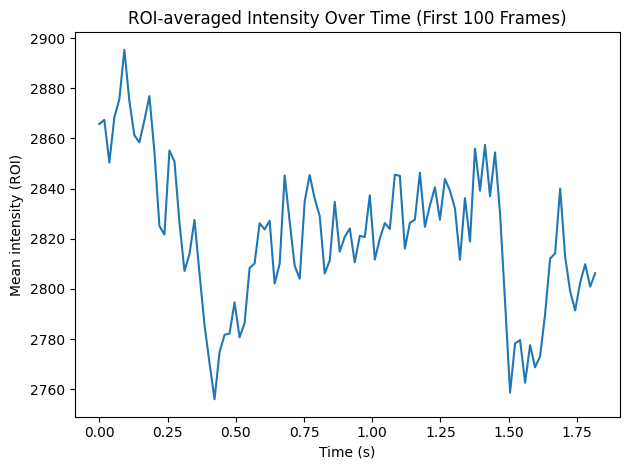

In [7]:
roi_center = (height//2, width//2)
roi_halfsize = 5
roi = frames[:, roi_center[0]-roi_halfsize:roi_center[0]+roi_halfsize, roi_center[1]-roi_halfsize:roi_center[1]+roi_halfsize]
roi_timeseries = roi.mean(axis=(1,2))

plt.figure()
plt.plot(np.arange(n_subset) / movies.rate, roi_timeseries)
plt.xlabel("Time (s)")
plt.ylabel("Mean intensity (ROI)")
plt.title("ROI-averaged Intensity Over Time (First 100 Frames)")
plt.tight_layout()
plt.show()

### Kymograph Along a Line**

A "kymograph" is a 2D image showing how pixel intensity evolves over time along a line (e.g., perpendicular to the vessel). Here, we extract a vertical line across the vessel center in each frame:

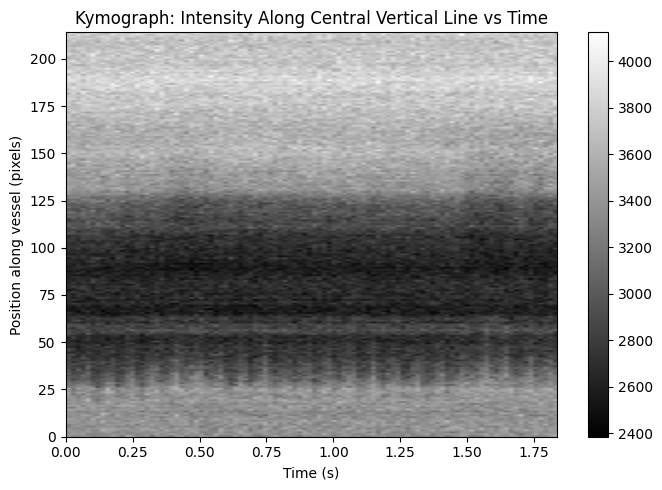

In [8]:
line_x = roi_center[1]
kymograph = frames[:, :, line_x]
plt.figure(figsize=(7,5))
plt.imshow(kymograph.T, aspect='auto', cmap="gray", origin="lower",
           extent=[0, n_subset / movies.rate, 0, height])
plt.xlabel("Time (s)")
plt.ylabel("Position along vessel (pixels)")
plt.title("Kymograph: Intensity Along Central Vertical Line vs Time")
plt.colorbar()
plt.tight_layout()
plt.show()

The kymograph shows how the vessel’s diameter and position may change over time. This is a simple, visual way to seek evidence of pulsatility or motion.

---
## Next Steps and Further Exploration

- Explore additional ROIs for diameter or position tracking.
- Calculate vessel boundaries by thresholding or edge detection for each frame to estimate diameter changes.
- Compare quantification approaches: Radon transform, FWHM, manual annotation metrics, etc.
- Analyze multiple datasets, experimental conditions, or mouse subjects as required for your research question.

**Interpretation tip:**  
The mean image reveals vessel layout, kymograph shows temporal dynamics, and simple ROI time series can help identify vessel pulsatility. For robust vessel diameter quantification, consider additional image processing and diligent validation.

To explore more data or other NWB files from this Dandiset, repeat the loading steps above and consult DANDI/NWB documentation for advanced usage.

---
## Summary and Research Context

This notebook demonstrated:
- Accessing Dandiset 001366 using the DANDI API
- Navigating the NWB file structure and displaying metadata
- Loading and summarizing a microscopy movie from an NWB file
- Visualizing both the mean image and an individual timepoint to reveal vessel structure
- Creating a simple kymograph and ROI timeseries for initial pulsatility exploration

**Next steps:**  
For detailed analyses and a rigorous comparison of measurement approaches, users are encouraged to try out different vessel quantification algorithms and perform further temporal/statistical analysis using the raw data here.

**Please verify results and code before conducting further analysis or drawing conclusions from these data.**